# Part 1

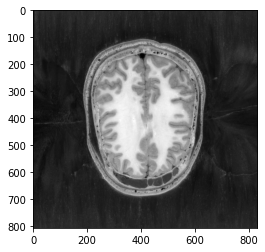

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

color_mri = cv2.imread('./Color_MRI.png')
gray_mri = cv2.cvtColor(color_mri, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_mri, cmap='gray')
plt.show()

# Part 2

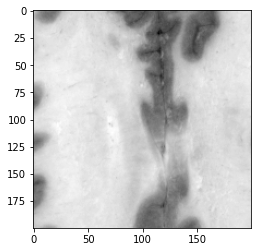

In [2]:
img_cut = gray_mri[300:500, 300:500]

plt.imshow(img_cut, cmap='gray')
plt.show()

In [3]:
white_seed = (325, 350)
print('White seed intensity : '+str(gray_mri[white_seed]))

gray_seed = (325, 450)
print('Gray seed intensity : '+str(gray_mri[gray_seed]))

White seed intensity : 201
Gray seed intensity : 135


# Part 3

In [4]:
region_image = np.zeros(gray_mri.shape, dtype=np.uint8)

region_image[white_seed] = 200
region_image[gray_seed] = 135

# Part 4

In [5]:
def region_growing(max_distance, threshold_type, seed, kernel, region_image, base_image, iteration=1):
    
    seed_value = base_image[seed]
    seed_region = region_image[seed]
    
    # threshold type
    threshold = 0
    if threshold_type == 'constant':
        threshold = seed_value
    elif threshold_type == 'variable':
        total = 0
        count = 0
        for i in range(region_image.shape[0]):
            for j in range(region_image.shape[1]):
                if region_image[i, j] == seed_region:
                    total += base_image[i, j]
                    count += 1
        threshold = total / count
    
    # select current region pixels
    region_separated = np.zeros(region_image.shape, dtype=np.uint8)
    for i in range(region_image.shape[0]):
        for j in range(region_image.shape[1]):
            if region_image[i, j] == seed_region:
                region_separated[i, j] = 255
                
    # Candidate pixels of current region
    region_expanded = cv2.morphologyEx(region_separated, cv2.MORPH_DILATE, kernel, iterations=iteration)
    region_candidates = region_expanded - region_separated
    
    # Check candidates and current region
    for i in range(region_candidates.shape[0]):
        for j in range(region_candidates.shape[1]):
            if region_candidates[i, j] > 0:
                original_intensity = base_image[i, j]
                if abs(int(original_intensity) - int(threshold)) <= max_distance:
                    region_candidates[i, j] = seed_region
                else:
                    region_candidates[i, j] = 0
    
    # Check to end iteration
    is_changed = np.sum(region_candidates) != 0
    
    region_image += region_candidates
    
    return is_changed, region_image

# Part 5

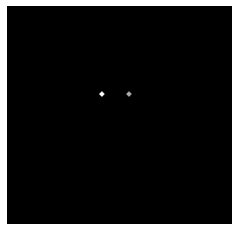

In [6]:
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], np.uint8)
is_changed, region_image = region_growing(50, 'constant', white_seed, kernel, region_image, gray_mri, 10)
is_changed, region_image = region_growing(50, 'constant', gray_seed, kernel, region_image, gray_mri, 10)

plt.imshow(region_image, cmap='gray')
plt.axis('off')
plt.show()

# Part 6

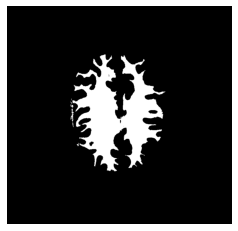

In [7]:
white_constant = np.zeros(gray_mri.shape, dtype=np.uint8)

white_constant[white_seed] = 245
white_constant[gray_seed] = 170

i = 0
while True:
    is_changed, region_image = region_growing(40, 'constant', white_seed, kernel, white_constant, gray_mri, 5)
    if not is_changed:
        break
    i += 1
    print('number of iterations : 'f'{i}', end = '\r')

plt.imshow(white_constant, cmap='gray')
plt.axis('off')
plt.show()

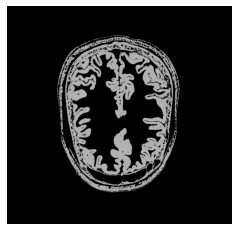

In [8]:
gray_constant = np.zeros(gray_mri.shape, dtype=np.uint8)

gray_constant[white_seed] = 245
gray_constant[gray_seed] = 170

while True:
    is_changed, gray_constant = region_growing(20, 'constant', gray_seed, kernel, gray_constant, gray_mri, 5)
    if not is_changed:
        break
    i += 1
    print('number of iterations(including white part) : 'f'{i}', end = '\r')

plt.imshow(gray_constant, cmap='gray')
plt.axis('off')
plt.show()

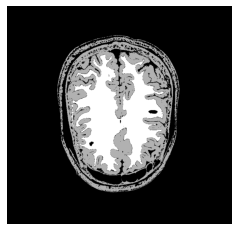

iterations for constant threshold: 314


In [9]:
total_constant = np.array(white_constant) + np.array(gray_constant)

plt.imshow(total_constant,cmap='gray')
plt.axis('off')
plt.show()
print(f'iterations for constant threshold: ' + str(i))

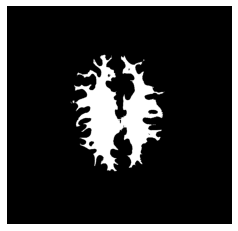

In [10]:
white_variable = np.zeros(gray_mri.shape, dtype=np.uint8)

white_variable[white_seed] = 245
white_variable[gray_seed] = 170

i = 0
while True:
    is_changed, white_variable = region_growing(25, 'variable', white_seed, kernel, white_variable, gray_mri, 5)
    if not is_changed:
        break
    i +=1
    print('number of iterations : 'f'{i}', end = '\r')

plt.imshow(white_variable, cmap='gray')
plt.axis('off')
plt.show()

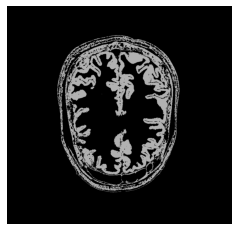

In [11]:
gray_variable = np.zeros(gray_mri.shape, dtype=np.uint8)

gray_variable[white_seed] = 245
gray_variable[gray_seed] = 170

while True:
    is_changed, gray_variable = region_growing(15, 'variable', gray_seed, kernel, gray_variable, gray_mri, 5)
    if not is_changed:
        break
    i += 1
    print('number of iterations(including white part) : 'f'{i}', end = '\r')

plt.imshow(gray_variable, cmap='gray')
plt.axis('off')
plt.show()

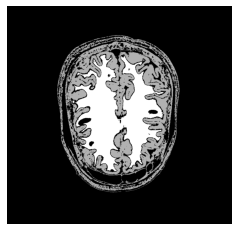

iterations for variable threshold:321


In [12]:
total_variable = np.array(gray_variable) + np.array(white_variable)
plt.imshow(total_variable,cmap='gray')
plt.axis('off')
plt.show()
print(f'iterations for variable threshold:' + str(i))

# Part 8

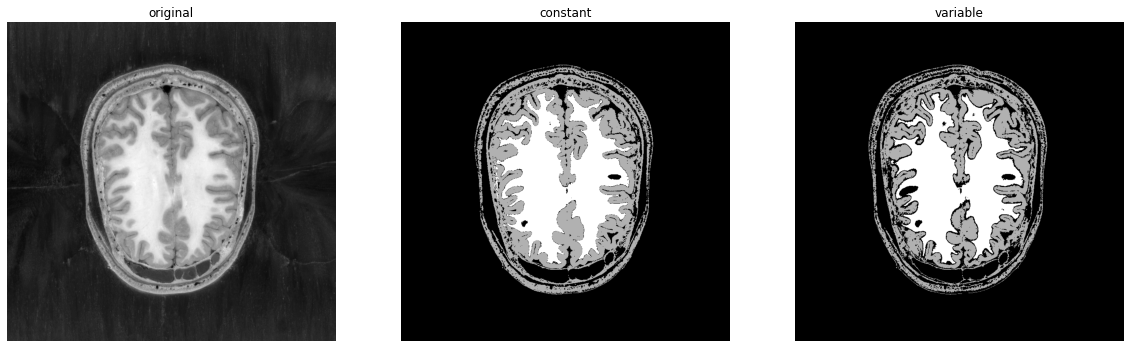

In [13]:
plt.subplots(1, 3, figsize=(20, 30))

plt.subplot(1,3,1)
plt.imshow(gray_mri, cmap='gray')
plt.title('original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(total_constant, cmap='gray')
plt.title('constant')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(total_variable, cmap='gray')
plt.title('variable')
plt.axis('off')

plt.show()

### Both of algorithmes performanced very well and they seperated white part and gray part so good.
### I think variable threshold has a better performance based on results and it shows intensity of parts better than constant treshold due to updating values. Also, variable treshold was faster than constant treshold. Both of algorithmes has similar iterations and constant treshold returned the result after 314 iterations and variable treshold returened the result after 321 iterations.